<a href="https://colab.research.google.com/github/AlexandreKc/EV1_ML_CRISPDM/blob/main/Informe_Tecnico_FMY0100_(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

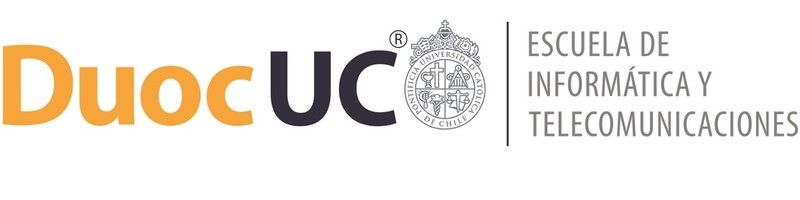

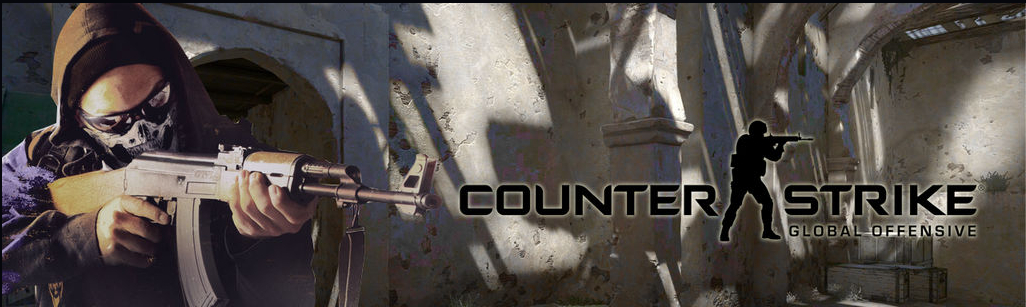

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
- Sebastián Carrera.
- Yasna Villarroel.
- Kevin Vivanco.

Docente:
- Giocrisrai Godoy Bonillo

Sección: 003V

#### Este informe presenta un análisis exhaustivo de los datos de partidas de Counter-Strike: Global Offensive (CS:GO), con el objetivo de proporcionar información valiosa y modelos predictivos para la empresa Valve.
#### El análisis se estructura siguiendo la metodología CRISP-DM, abarcando las fases de Entendimiento del Negocio, Comprensión de los Datos y Preparación de los Datos.

# Caso Fundamentos de Machine Learning

---
## Fase 1: Business Understanding
---

## **1.1 CONTEXTO DE NEGOCIO**
### **1.1.1 Descripción del Juego**

*   Valve, una empresa líder en la industria de los videojuegos, ha contactado a nuestro equipo de análisis de datos y modelado de Machine Learning para analizar y desarrollar modelos predictivos basados en datos de partidas de Counter-Strike: Global Offensive (CS:GO).
*   CS:GO es un juego de disparos en primera persona (FPS) táctico y competitivo, donde dos equipos de cinco jugadores se enfrentan. Estos equipos se denominan Terroristas (T) y Contra-Terroristas (CT).
*   En cada ronda, los equipos tienen objetivos distintos:
#####🔹 **Terroristas (T):** El principal objetivo de los Terroristas es plantar una bomba (denominada "C4") en uno de los dos sitios de bomba designados dentro del mapa. Una vez plantada, la bomba tiene un temporizador de 45 segundos antes de explotar.
#####🔹 **Contra-Terroristas (CT):** El objetivo de los Contra-Terroristas es evitar que los Terroristas planten la bomba. Si la bomba es plantada, los CT deben desactivarla antes de que explote. También pueden ganar la ronda eliminando a todos los jugadores Terroristas.
*   El juego se caracteriza por su economía, donde los jugadores ganan dinero en el juego por acciones como eliminar enemigos, ganar rondas o plantar/desactivar la bomba. Este dinero se utiliza para comprar armas, armaduras y equipamiento al comienzo de cada ronda. Las decisiones sobre qué comprar y cuándo pueden ser cruciales para el éxito.
*   Las partidas se dividen en rondas, y el primer equipo en alcanzar un número determinado de rondas ganadas gana la partida. Los equipos cambian de bando (T a CT o viceversa) a la mitad de la partida.

### **1.1.2 Cliente**
*   Valve Corporation
*   Valve es el desarrollador y distribuidor de CS:GO, así como el operador de la plataforma de distribución digital de videojuegos Steam.
*   Valve busca utilizar el análisis de datos y el modelado de Machine Learning para obtener información valiosa sobre el juego, lo que les permite tomar decisiones informadas sobre:
#####🔹 El equilibrio del juego
#####🔹 El diseño de mapas
#####🔹 El desarrollo de nuevas características
#####🔹 La experiencia del jugador en general

### **1.1.3 Datos Disponibles**
*   Los datos que se proporcionarán para el análisis corresponden a un conjunto de más de 7000 partidas de CS:GO. Cada partida involucra un máximo de 10 jugadores (5 por equipo).
*   La información se ha extraído de archivos de repetición (replays) de CS:GO. Los replays son archivos propietarios que contienen un registro detallado de cada acción realizada por cada jugador durante una partida. Esto incluye movimientos, disparos, compras, uso de equipamiento, etc.
*   Los replays han sido procesados y extraídos utilizando un "scrapper" (una herramienta que automatiza la extracción de datos) y luego preprocesados utilizando un script para limpiar y estructurar los datos.
*   El conjunto de datos final se presenta en formato CSV (Comma Separated Value), que es un formato tabular común para el almacenamiento y análisis de datos.
*   El dataset contiene 79.157 filas, donde cada fila corresponde a las acciones y el rendimiento de un jugador individual dentro de una ronda específica de una partida.
*   El dataset incluye 29 columnas que representan diversas variables que describen las acciones, el rendimiento y el contexto de cada jugador dentro del juego. Estas variables incluyen:
#####🔹**Información de la partida y la ronda** (e.g., Map, MatchId, RoundId)
#####🔹 **Información del equipo** (e.g., Team, InternalTeamId)
#####🔹 **Rendimiento del jugador** (e.g., Kills, Assists, Headshots, TimeAlive, TravelledDistance)
#####🔹 **Equipamiento** (e.g., RoundStartingEquipmentValue, TeamStartingEquipmentValue, PrimaryXXXX)
#####🔹 **Resultados** (e.g., RoundWinner, MatchWinner, Survived)
#####🔹 **Acciones** (e.g., RLethalGrenadesThrown, RNonLethalGrenadesThrown, FlankKills)

*   **Contexto:** El dataset proporciona una visión completa y detallada de las acciones de los jugadores en las partidas de CS:GO, lo que permite analizar diversos aspectos del juego, como el rendimiento individual, las estrategias de equipo y los factores que influyen en el resultado de las partidas.

$$
\boxed{
\begin{array}{|l|l|}
\hline
\textbf{Dato} & \textbf{Descripción} \\
\hline
\text{Map} & \text{Nombre del Mapa donde se jugó la partida} \\
\hline
\text{Team} & \text{Nombre de equipo al que pertenece el jugador} \\
\hline
\text{InternalTeamId} & \text{Identificador del equipo al que pertenece el jugador} \\
\hline
\text{MatchId} & \text{Identificador de la partida} \\
\hline
\text{RoundId} & \text{Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline
\text{MatchWinner} & \text{Indica si el jugador ganó o no la partida} \\
\hline
\text{RoundWinner} & \text{Indica si el jugador ganó o no la ronda analizada.} \\
\hline
\text{Survived} & \text{ Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar)} \\
\hline
\text{AbnormalMatch} & \text{Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline
\text{TimeAlive} & \text{Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline
\text{TravelledDistance} & \text{Distancia viajada por el jugador durante la partida.} \\
\hline
\text{RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text{Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline
\text{PrimaryXXXX} & \text{Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline
\text{[Match Round] Assists} & \text{Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline
\text{[Match|Round] Kills} & \text{Cantidad de kills efectuados por el jugador durante la partida o la ronda} \\
\hline
\text{[Match|Round] FlankKills} & \text{Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline
\text{[Match|Round] HeadShots} & \text{Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline
\text{RoundStartingEquipmentValue} & \text{Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline
\text{TeamStartingEquipmentValue} & \text{Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\hline
\end{array}
}
$$

## **1.2 OBJETIVOS DEL NEGOCIO**

*   Problema: El problema central que se abordará en este proyecto es comprender los factores que determinan el éxito de un equipo en CS:GO. Esto implica analizar la influencia de las diversas variables disponibles en el dataset para identificar patrones y relaciones que puedan explicar por qué algunos equipos ganan más partidas que otros.

*   Público objetivo: Los resultados de este análisis pueden ser de interés de jugadores que puedan estar atraidos por mejorar su desempeño, equipos profesionales, entrenadores y casas de apuesta.

*   Valve, como cliente principal, puede tener objetivos más específicos relacionados con el desarrollo del juego y la mejora de la experiencia del jugador.
*   Estos objetivos pueden incluir:
#####🔹  **Balance del juego:** Analizar si ciertas armas, mapas o estrategias proporcionan una ventaja injusta a un equipo.
#####🔹 **Diseño de mapas:** Comprender cómo los jugadores se mueven y utilizan los mapas para informar el diseño de futuros mapas.
#####🔹  **Emparejamiento de jugadores:** Mejorar el sistema de emparejamiento para crear partidas más equilibradas y competitivas.
#####🔹  **Detección de trampas:** Identificar patrones de juego que puedan indicar el uso de trampas.


## **1.3 OBJETIVOS DE DATA MINING**
### **1.3.1 Clasificación: ¿Se puede predecir si un jugador sobrevivirá la ronda?**
Descripción:
* Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.

Variables relevantes:
#####🔹  **Survived:** Sobrevivencia en la ronda.
#####🔹  **RoundKills:** Cantidad de enemigos eliminados por el jugador en la ronda.
#####🔹  **RoundHeadshots:** Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
#####🔹  **RoundStartingEquipmentValue:** Valor del equipamiento del jugador al inicio de la ronda.

Hipótesis:
* "*La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda.*"


---

### **1.3.2 Regresión: : ¿El Valor del Equipamiento afecta en del Desempeño general del equipo?**

Descripción:
* Desarrollar un modelo de regresión que analice cómo el valor del equipamiento impacta en el desempeño del equipo durante una partida, medido a través de variables como la cantidad de eliminaciones (kills), precisión en disparos a la cabeza (headshots) y eliminaciones por flanqueo (flank kills).

Variables relevantes:
* Valor de Equipamiento Inicial:
#####🔹  **TeamStartingEquipmentValue:** Principal variable predictora.

* Medidas de desempeño:
#####🔹  **MatchKills:** Número total de enemigos eliminados en la partida.
#####🔹  **MatchHeadshots:** Número total de disparos a la cabeza.
#####🔹  **MatchFlankKills:** Número total de eliminaciones al flanquear al oponente.

* Contexto adicional:
#####🔹  **Survived:** Sobrevivencia en la ronda.

Hipótesis:
* "*Un mayor valor de equipamiento mejora el desempeño del equipo en la partida, posiblemente aumentando la cantidad de kills dentro de la partida.*"

In [9]:
!pip install joblib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving csgo_datos_corregidos.csv to csgo_datos_corregidos.csv


In [3]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


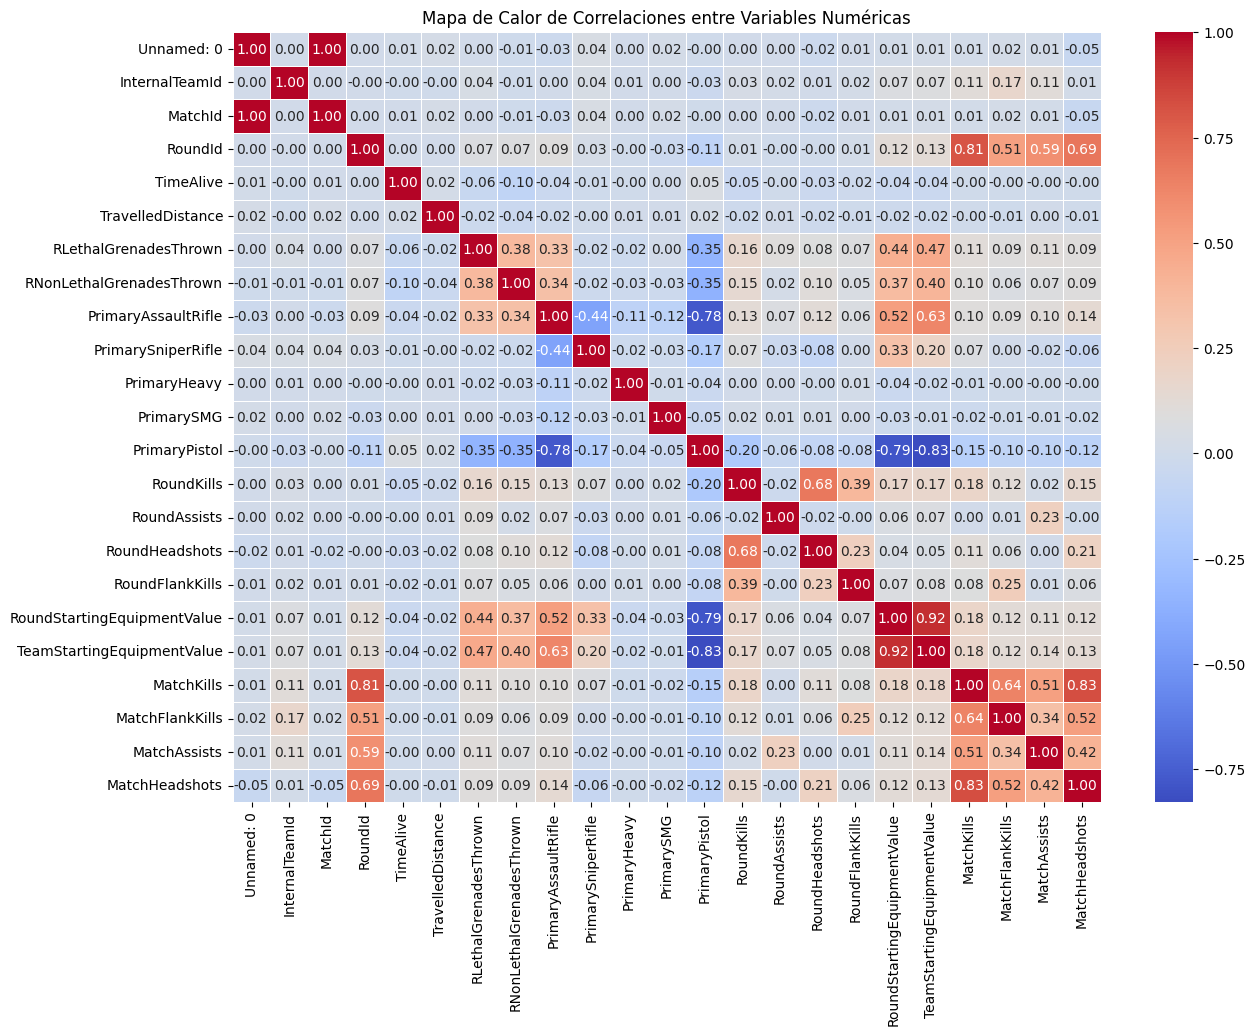

In [4]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Ajustar el tamaño del gráfico
plt.figure(figsize=(14, 10))

# Crear el mapa de calor
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

#Modelo RandomForestRegressor

In [5]:
#Selección de variables clave

df_corr = df[[
    'MatchHeadshots',
    'TeamStartingEquipmentValue',
    'MatchFlankKills',
    'MatchAssists',
    'MatchKills'  # 🎯 Variable objetivo
]]


In [6]:
# 📈 División del dataset

X = df_corr.drop('MatchKills', axis=1)
y = df_corr['MatchKills']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Entrenamiento - Random Forest

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicción y evaluación

y_pred = model.predict(X_test)

# 📐 Métricas

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
rse = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p - 1))

# 🧾 Mostrar resultados

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RSE: {rse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2.08
RMSE: 2.81
MSE: 7.91
RSE: 2.81
R²: 0.80


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


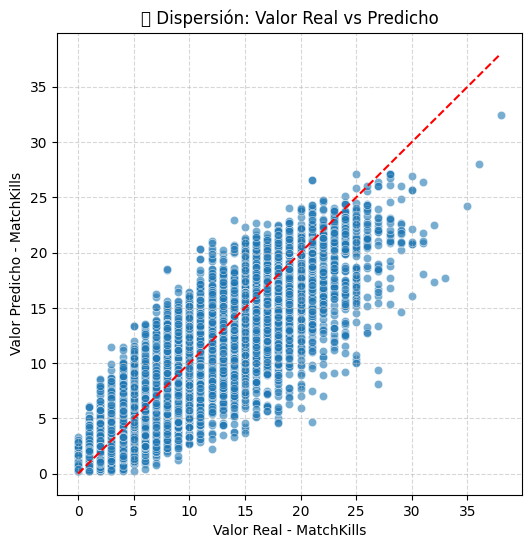

In [7]:
# 📈 Comparación: y_test vs y_pred

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Valor Real - MatchKills')
plt.ylabel('Valor Predicho - MatchKills')
plt.title('🔍 Dispersión: Valor Real vs Predicho')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [12]:
joblib.dump(model, "modelo_regresion.pkl")

['modelo_regresion.pkl']

In [14]:
from google.colab import files
files.download("modelo_regresion.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>